This notebook covers concepts of new ToMnet-N version training on new task: supermarket

It covers:
- How ToMnet-N is constructed [Architecture + implementation with functional API]
- How ToMnet-N interprets game data [pre-processing and decomposition]
- Visualisation of ToMnet-N predictions

# Stage 1: Getting cost-efficience scores

## Cycle 1: Regressing actual preferences of one agent with loss that knows correct values

In [16]:
# To import Modules the Top-Level folder must be added to Path!
import sys
sys.path.append('d:\Programming\Dissertation - ToMnet\ToMnet-N')

In [17]:
from src.game_generation.utils.agent_player import get_agent_types

agent_types = get_agent_types()
agent_types

d:\Programming\Dissertation - ToMnet\ToMnet-N\src\game_generation\utils


['agent_1', 'agent_2', 'agent_3']

In [18]:
from src.game_generation.utils.agent_player import load_agent_preferences

agent = agent_types[0]
goal_values = load_agent_preferences(agent)
goal_values

{'Goal_A': 10,
 'Goal_B': 9,
 'Goal_C': 8,
 'Goal_D': 7,
 'Goal_E': 6,
 'Goal_F': 5,
 'Goal_G': 4}

In [19]:
import pandas as pd

x = pd.get_dummies(agent)
x

,agent_1
0,True


In [20]:
y = pd.DataFrame(goal_values.values()).T
output_size = y.shape[1]
y, output_size

(    0  1  2  3  4  5  6
 0  10  9  8  7  6  5  4,
 7)

Creating a model

In [21]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras import Input


def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

In [22]:
model = build_and_compile_model()
model.summary()

Model: "sequential_401"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1601 (Dense)          (None, 7)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.predict(x)

1/1 [==============================] - 0s 50ms/step


array([[ 0.85587543,  0.81034964, -0.69656265,  0.75566036, -0.4065455 ,
        -0.4309956 , -0.601326  ]], dtype=float32)

Initially model gives random numers

Let's train it now!

In [24]:
model.fit(x,y,epochs=1)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2858, in while_loop
    return result  File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2814, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))  File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\tensorflow\python\ops\map_fn.py", line 496, in compute
    return (i + 1, tas)  File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\tensorflow\python\ops\map_fn.py", line 494, in <listcomp>
    ta.write(i, value) for (ta, value) in zip(tas, result_value_batchable)  File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\tensorflow\python\util\tf_s

KeyboardInterrupt: 

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 27ms/step


array([[ 0.6571341 , -0.72946215, -0.608202  ,  0.65597826,  0.70041245,
         0.71044   ,  0.17610195]], dtype=float32)

In [ ]:
model.fit(x,y,epochs=500)
model.predict(x)

Epoch 1/500
1/1 [==============================] - 0s 9ms/step - loss: 6.7768
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 6.7748
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 6.7728
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 6.7708
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 6.7688
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 6.7668
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 6.7648
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 6.7628
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 6.7608
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 6.7588
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 6.7568
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 6.7548
Epoch 13/500
1/1 [==============================] - 0s 4ms/st

KeyboardInterrupt: 

In [ ]:
history = model.fit(x,y,epochs=1000)
model.predict(x)

Epoch 1/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.6847
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.6827
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.6807
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.6787
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.6767
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.6747
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.6727
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.6707
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.6687
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.6667
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.6647
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.6627
Epoch 13/1000
1/1 [==============================

array([[3.687458 , 3.4664183, 3.3490956, 3.1310947, 3.8123064, 3.242868 ,
        2.5182385]], dtype=float32)

In [ ]:
y

,0,1,2,3,4,5,6
0,10,9,8,7,6,5,4


In [ ]:
y - model.predict(x)

1/1 [==============================] - 0s 26ms/step


,0,1,2,3,4,5,6
0,6.312542,5.533582,4.650904,3.868905,2.187694,1.757132,1.481761


Hurray! Model learnt preferences!

Even with obvious overfitting the model struggles to learn fast perhaps due to the scale

I will try normalizing output and check how it helps

In [ ]:
y_norm = y / y.max().max()
y_norm

,0,1,2,3,4,5,6
0,1.0,0.9,0.8,0.7,0.6,0.5,0.4


In [ ]:
model = build_and_compile_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 7)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x, y_norm, epochs=1500)

Epoch 1/1500
1/1 [==============================] - 1s 584ms/step - loss: 1.0752
Epoch 2/1500
1/1 [==============================] - 0s 5ms/step - loss: 1.0732
Epoch 3/1500
1/1 [==============================] - 0s 5ms/step - loss: 1.0712
Epoch 4/1500
1/1 [==============================] - 0s 4ms/step - loss: 1.0692
Epoch 5/1500
1/1 [==============================] - 0s 4ms/step - loss: 1.0672
Epoch 6/1500
1/1 [==============================] - 0s 4ms/step - loss: 1.0652
Epoch 7/1500
1/1 [==============================] - 0s 3ms/step - loss: 1.0632
Epoch 8/1500
1/1 [==============================] - 0s 5ms/step - loss: 1.0612
Epoch 9/1500
1/1 [==============================] - 0s 4ms/step - loss: 1.0592
Epoch 10/1500
1/1 [==============================] - 0s 5ms/step - loss: 1.0572
Epoch 11/1500
1/1 [==============================] - 0s 5ms/step - loss: 1.0552
Epoch 12/1500
1/1 [==============================] - 0s 3ms/step - loss: 1.0532
Epoch 13/1500
1/1 [============================

In [ ]:
history

In [ ]:
history.history

{'loss': [1.0752462148666382,
  1.0732463598251343,
  1.0712463855743408,
  1.0692464113235474,
  1.067246437072754,
  1.0652464628219604,
  1.063246488571167,
  1.0612465143203735,
  1.0592464208602905,
  1.0572465658187866,
  1.0552465915679932,
  1.0532466173171997,
  1.0512466430664062,
  1.0492466688156128,
  1.0472465753555298,
  1.0452466011047363,
  1.0432466268539429,
  1.0412466526031494,
  1.039246678352356,
  1.0372467041015625,
  1.035246729850769,
  1.0332467555999756,
  1.0312467813491821,
  1.0292466878890991,
  1.0272467136383057,
  1.0252468585968018,
  1.0232468843460083,
  1.0212467908859253,
  1.0192469358444214,
  1.0172468423843384,
  1.015246868133545,
  1.0132468938827515,
  1.011246919631958,
  1.0092469453811646,
  1.007246971130371,
  1.0052469968795776,
  1.0032470226287842,
  1.0012470483779907,
  0.9992470145225525,
  0.997247040271759,
  0.9952470064163208,
  0.9932470917701721,
  0.9912470579147339,
  0.9892470240592957,
  0.9872470498085022,
  0.985247

In [ ]:
history.history["loss"]

[1.0752462148666382,
 1.0732463598251343,
 1.0712463855743408,
 1.0692464113235474,
 1.067246437072754,
 1.0652464628219604,
 1.063246488571167,
 1.0612465143203735,
 1.0592464208602905,
 1.0572465658187866,
 1.0552465915679932,
 1.0532466173171997,
 1.0512466430664062,
 1.0492466688156128,
 1.0472465753555298,
 1.0452466011047363,
 1.0432466268539429,
 1.0412466526031494,
 1.039246678352356,
 1.0372467041015625,
 1.035246729850769,
 1.0332467555999756,
 1.0312467813491821,
 1.0292466878890991,
 1.0272467136383057,
 1.0252468585968018,
 1.0232468843460083,
 1.0212467908859253,
 1.0192469358444214,
 1.0172468423843384,
 1.015246868133545,
 1.0132468938827515,
 1.011246919631958,
 1.0092469453811646,
 1.007246971130371,
 1.0052469968795776,
 1.0032470226287842,
 1.0012470483779907,
 0.9992470145225525,
 0.997247040271759,
 0.9952470064163208,
 0.9932470917701721,
 0.9912470579147339,
 0.9892470240592957,
 0.9872470498085022,
 0.9852470755577087,
 0.9832471609115601,
 0.981247067451477,
 

<Axes: >

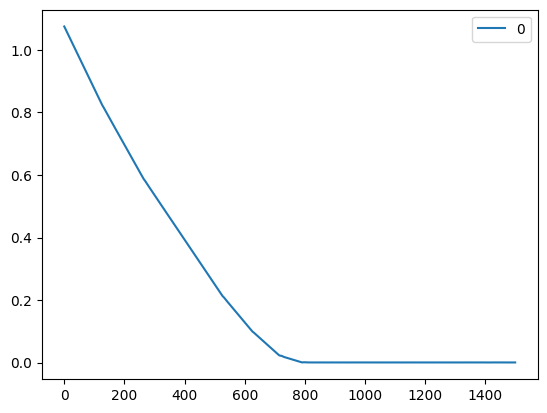

In [ ]:
p = pd.DataFrame(history.history["loss"])
p.plot()

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 101ms/step


array([[1.0003166 , 0.8999976 , 0.7999912 , 0.69999367, 0.5996752 ,
        0.4997041 , 0.39984727]], dtype=float32)

In [ ]:
y.max().max()*model.predict(x)

1/1 [==============================] - 0s 21ms/step


array([[10.003166 ,  8.999976 ,  7.999912 ,  6.9999366,  5.996752 ,
         4.9970407,  3.9984727]], dtype=float32)

It works pretty well, but speed of 600 epoch is not very pleasunt

Let's try accelerate learning by increasing number of neurons

In [ ]:
def build_and_compile_model2():
  model = Sequential([
      Input(shape=(1,)),
      Dense(output_size),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

In [ ]:
model2 = build_and_compile_model2()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 14        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(x, y_norm, epochs=1500)

Epoch 1/1500
1/1 [==============================] - 1s 684ms/step - loss: 0.7060
Epoch 2/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.6994
Epoch 3/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.6928
Epoch 4/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.6862
Epoch 5/1500
1/1 [==============================] - 0s 5ms/step - loss: 0.6796
Epoch 6/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.6731
Epoch 7/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.6666
Epoch 8/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.6601
Epoch 9/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.6537
Epoch 10/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.6472
Epoch 11/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.6408
Epoch 12/1500
1/1 [==============================] - 0s 11ms/step - loss: 0.6344
Epoch 13/1500
1/1 [===========================

<Axes: >

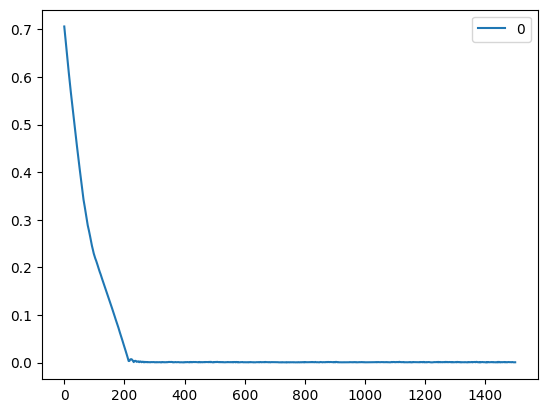

In [ ]:
p = pd.DataFrame(history2.history["loss"])
p.plot()

I increased number of neurons x5 (14 -> 70)

And it accelerated learning x3.5 (700 epochs -> 200 epochs)

I want to achieve learning at very fast rate. Around 5-15 epochs. So I begin the play around architecture

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 14        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
1/1 [==============================] - 1s 629ms/step - loss: 0.7587
Epoch 2/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.7495
Epoch 3/1500
1/1 [==========

<Axes: >

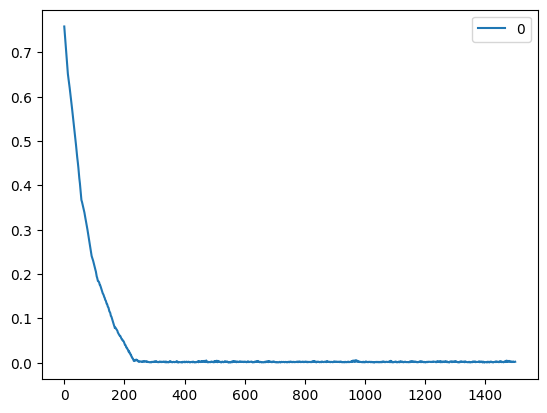

In [ ]:
def build_and_compile_model3():
  model = Sequential([
      Input(shape=(1,)),
      Dense(output_size),
      Dense(output_size),
      Dense(output_size),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

model3 = build_and_compile_model3()
model3.summary()

history3 = model3.fit(x, y_norm, epochs=1500)

p = pd.DataFrame(history3.history["loss"])
p.plot()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 14        
                                                                 
 dense_9 (Dense)             (None, 14)                112       
                                                                 
 dense_10 (Dense)            (None, 7)                 105       
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
1/1 [==============================] - 1s 594ms/step - loss: 0.7534
Epoch 2/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.7398
Epoch 3/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.7263
Epoch 4/1500
1/1 [==============================] - 0s 5ms/step - loss: 0.7128
Ep

<Axes: >

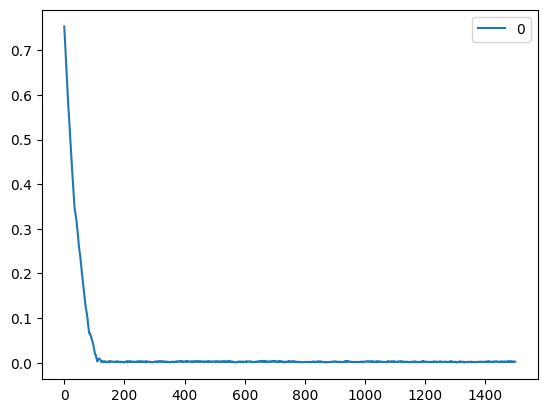

In [ ]:
def build_and_compile_model4():
  model = Sequential([
      Input(shape=(1,)),
      Dense(output_size),
      Dense(2*output_size),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

model4 = build_and_compile_model4()
model4.summary()

history4 = model4.fit(x, y_norm, epochs=1500)

p = pd.DataFrame(history4.history["loss"])
p.plot()

So, it is not only about number of layers, but also about the units distribution among layers

7x7x7x7 architecture performed worse than

7x14x7 architecture 

The last one performed twice faster learning!

Let's test other architectures

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 7)                 14        
                                                                 
 dense_22 (Dense)            (None, 14)                112       
                                                                 
 dense_23 (Dense)            (None, 28)                420       
                                                                 
 dense_24 (Dense)            (None, 14)                406       
                                                                 
 dense_25 (Dense)            (None, 7)                 105       
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 1

<Axes: >

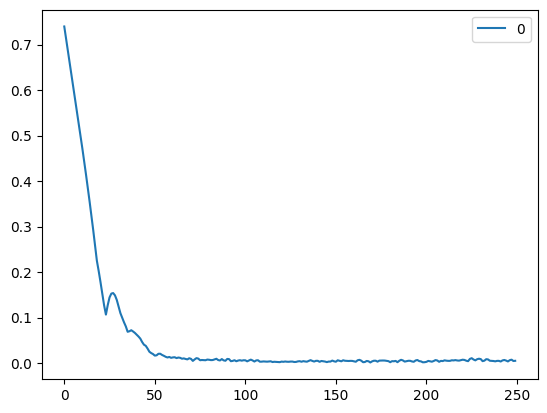

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(output_size),
      Dense(2*output_size),
      Dense(4*output_size),
      Dense(2*output_size),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

model = build_and_compile_model()
model.summary()

history = model.fit(x, y_norm, epochs=250)

p = pd.DataFrame(history.history["loss"])
p.plot()

Architecture 7x14x28x14x7 achieced the best result so far - 50 epochs

Let's try adding non-linear activation

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 7)                 14        
                                                                 
 dense_47 (Dense)            (None, 14)                112       
                                                                 
 dense_48 (Dense)            (None, 28)                420       
                                                                 
 dense_49 (Dense)            (None, 14)                406       
                                                                 
 dense_50 (Dense)            (None, 7)                 105       
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 

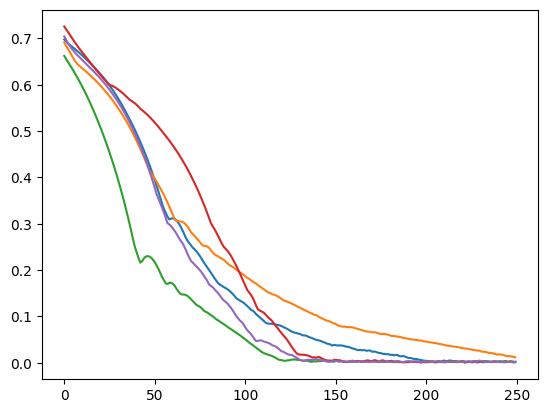

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(output_size, activation="relu"),
      Dense(2*output_size, activation="relu"),
      Dense(4*output_size, activation="relu"),
      Dense(2*output_size, activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=250))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

In general it takes a bit more than 100 epochs to train now

Let's try smaller network but with non-linearity

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 7)                 14        
                                                                 
 dense_102 (Dense)           (None, 14)                112       
                                                                 
 dense_103 (Dense)           (None, 7)                 105       
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 0s 433ms/step - loss: 0.6835
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 0.6783
Epoch 3/250
1/1 [==============================] - 0s 8ms/step - loss: 0.6732
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 0.6680
Epoch

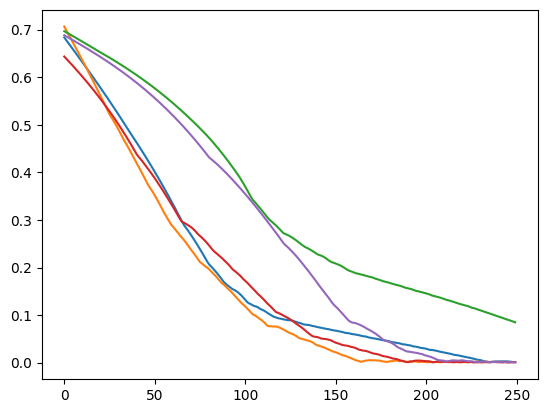

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(output_size, activation="relu"),
      Dense(2*output_size, activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=250))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

It performs worse

So, let's try increasing number of same layers with non-linearity 

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 7)                 14        
                                                                 
 dense_117 (Dense)           (None, 7)                 56        
                                                                 
 dense_118 (Dense)           (None, 7)                 56        
                                                                 
 dense_119 (Dense)           (None, 7)                 56        
                                                                 
 dense_120 (Dense)           (None, 7)                 56        
                                                                 
Total params: 238
Trainable params: 238
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 1s 5

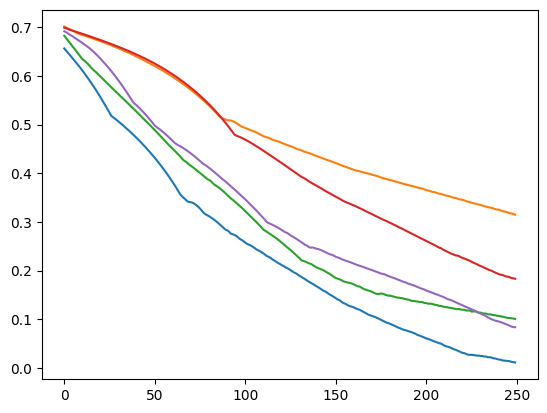

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(output_size, activation="relu"),
      Dense(output_size, activation="relu"),
      Dense(output_size, activation="relu"),
      Dense(output_size, activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=250))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

Ok, so the depth without width only made it worse.

Let's make it wider

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_286 (Dense)           (None, 14)                28        
                                                                 
 dense_287 (Dense)           (None, 28)                420       
                                                                 
 dense_288 (Dense)           (None, 56)                1624      
                                                                 
 dense_289 (Dense)           (None, 7)                 399       
                                                                 
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 1s 506ms/step - loss: 0.6802
Epoch 2/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6682
Epoch 3/250
1/1 [========

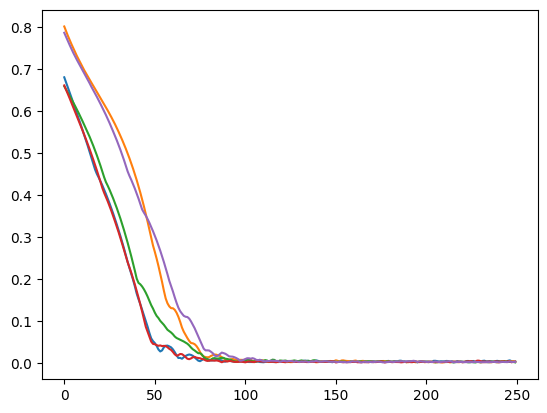

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(2*output_size, activation="relu"),
      Dense(4*output_size, activation="relu"),
      Dense(8*output_size, activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=250))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

Experimentally I found that architecture 2a x 4a x 8a x a 

Works much better and more stable than 2a x 4a x 8a x 4a x 2a x a

So, let's keep it increasing in depth with getting coser to the output, monotonically

LEt's try adding more regularisation here


Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_306 (Dense)           (None, 14)                28        
                                                                 
 dense_307 (Dense)           (None, 28)                420       
                                                                 
 dense_308 (Dense)           (None, 56)                1624      
                                                                 
 dense_309 (Dense)           (None, 7)                 399       
                                                                 
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 1s 612ms/step - loss: 1.3260
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 1.3104
Epoch 3/250
1/1 [========

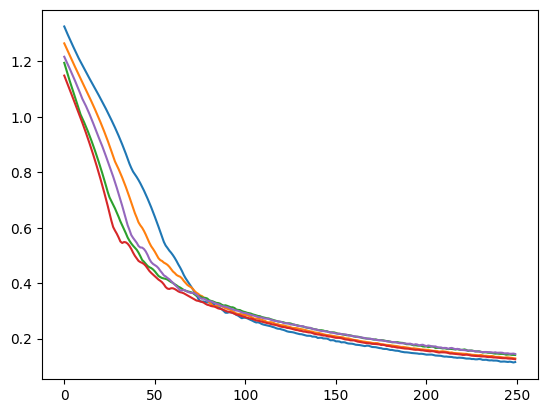

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(2*output_size, kernel_regularizer='l2', activation="relu"),
      Dense(4*output_size, kernel_regularizer='l2', activation="relu"),
      Dense(8*output_size, kernel_regularizer='l2', activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=250))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_326 (Dense)           (None, 14)                28        
                                                                 
 dense_327 (Dense)           (None, 28)                420       
                                                                 
 dense_328 (Dense)           (None, 56)                1624      
                                                                 
 dense_329 (Dense)           (None, 7)                 399       
                                                                 
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 3.6503
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 3.6186
Epoch 3/250
1/1 [===========

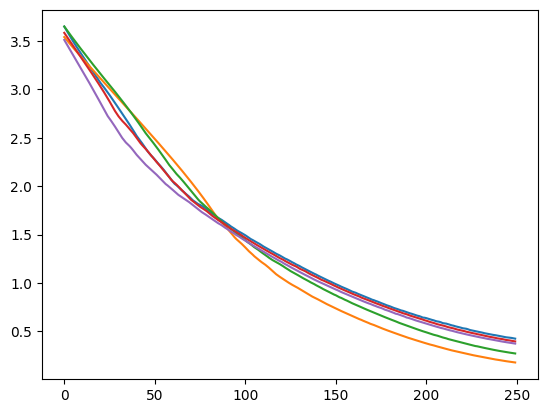

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(2*output_size, kernel_regularizer='l1', activation="relu"),
      Dense(4*output_size, kernel_regularizer='l1', activation="relu"),
      Dense(8*output_size, kernel_regularizer='l1', activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=250))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

Difficult to judge if regularisation helped in my over-simplified example

Let's stick with what works well - adding more neurons

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_366 (Dense)           (None, 14)                28        
                                                                 
 dense_367 (Dense)           (None, 28)                420       
                                                                 
 dense_368 (Dense)           (None, 56)                1624      
                                                                 
 dense_369 (Dense)           (None, 112)               6384      
                                                                 
 dense_370 (Dense)           (None, 7)                 791       
                                                                 
Total params: 9,247
Trainable params: 9,247
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 

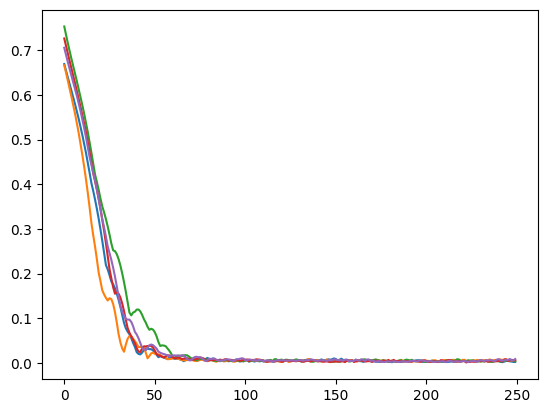

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(2*output_size, activation="relu"),
      Dense(4*output_size, activation="relu"),
      Dense(8*output_size, activation="relu"),
      Dense(16*output_size, activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=250))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_476 (Dense)           (None, 56)                112       
                                                                 
 dense_477 (Dense)           (None, 224)               12768     
                                                                 
 dense_478 (Dense)           (None, 896)               201600    
                                                                 
 dense_479 (Dense)           (None, 7)                 6279      
                                                                 
Total params: 220,759
Trainable params: 220,759
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 1s 600ms/step - loss: 0.6941
Epoch 2/250
1/1 [==============================] - 0s 5ms/step - loss: 0.6382
Epoch 3/250
1/1 [===

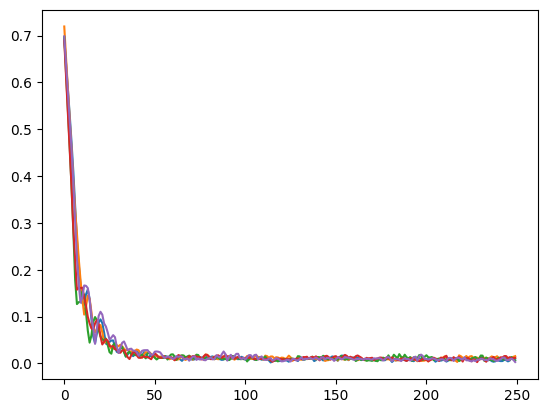

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(1,)),
      Dense(8*output_size, activation="relu"),
      Dense(32*output_size, activation="relu"),
      Dense(128*output_size, activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(1,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=250))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

Experimentally I found that I can increase the number of neurons more drammatically over the depth and it works even better

I can stick to this architecture and try change the task now limiting myself with 100 epochs and be almost sure it will finish learning by the end of 100th epoch

## Cycle 1.1: Predicting preferences of multiple agents

In [ ]:
agent_types = get_agent_types()
agent_types

d:\Programming\Dissertation - ToMnet\ToMnet-N\src\game_generation\utils


['agent_1', 'agent_2', 'agent_3']

In [ ]:
dic = dict()
for agent in agent_types:
    goal_values = load_agent_preferences(agent)
    dic[agent] = goal_values
    
data = pd.DataFrame(dic)
data

,agent_1,agent_2,agent_3
Goal_A,10,0,0
Goal_B,9,5,2
Goal_C,8,4,4
Goal_D,7,3,4
Goal_E,6,2,6
Goal_F,5,1,9
Goal_G,4,0,10


Here are 3 Agents and their preferences. Let's check if Neural Network can memorise them perfectly

In [ ]:
x = pd.get_dummies(data.columns) * 1
x

,agent_1,agent_2,agent_3
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
data.max(axis=1)

Goal_A    10
Goal_B     9
Goal_C     8
Goal_D     7
Goal_E     6
Goal_F     9
Goal_G    10
dtype: int64

In [ ]:
y_norm = (data.T / data.max(axis=1))
y_norm

,Goal_A,Goal_B,Goal_C,Goal_D,Goal_E,Goal_F,Goal_G
agent_1,1.0,1.000000,1.0,1.000000,1.000000,0.555556,0.4
agent_2,0.0,0.555556,0.5,0.428571,0.333333,0.111111,0.0
agent_3,0.0,0.222222,0.5,0.571429,1.000000,1.000000,1.0


In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(3,)),
      Dense(8*output_size, activation="relu"),
      Dense(32*output_size, activation="relu"),
      Dense(128*output_size, activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss="mean_absolute_error", #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(3,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=100))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

NameError: name 'Sequential' is not defined

Let's check how well it regressed to actual preferences

In [ ]:
import numpy as np

y_hat = pd.DataFrame(np.around(model.predict(x), decimals=2), index=y_norm.index, columns=y_norm.columns) * data.max(axis=1)
y_hat

1/1 [==============================] - 0s 90ms/step


,Goal_A,Goal_B,Goal_C,Goal_D,Goal_E,Goal_F,Goal_G
agent_1,9.9,9.09,7.84,7.07,5.88,4.95,4.2
agent_2,-0.1,5.22,4.08,3.15,1.92,0.99,0.1
agent_3,0.0,2.16,4.08,4.06,6.00,8.91,10.1


In [ ]:
data.T

,Goal_A,Goal_B,Goal_C,Goal_D,Goal_E,Goal_F,Goal_G
agent_1,10,9,8,7,6,5,4
agent_2,0,5,4,3,2,1,0
agent_3,0,2,4,4,6,9,10


Hurray! It works pretty well!

Now, the difficult part: give it a custom loss, where I can only check the top preference and tell if it is the same.

Basically, this experiemnt replicates goal consumption prediction, but I exclude image processing and giving only agent type as input data, simplifying the experiments na dreducisng number of sources that could impact on results.

If I can achieve nice performance with this type of loss here - I can do the same with image processing and go for cost-efficiency socre

In [ ]:
import tensorflow as tf

def custom_loss(y_true, y_pred):
    """ 
    y_ture [batch_size x output_shape]
    
    return [batch_size x 1]
    """
    y_true_ind = tf.map_fn(fn = lambda t: tf.argmax(t), elems=y_true, dtype=tf.int64)
    y_pred_ind = tf.map_fn(fn = lambda t: tf.argmax(t), elems=y_pred, dtype=tf.int64)
    total_loss = tf.map_fn(fn = lambda t: tf.cast(t[0] == t[1], tf.float32), elems=(y_true_ind, y_pred_ind), dtype=tf.float32)
    
    print("y_true: ", y_true)
    print("y_true_ind: ", y_true_ind)
    print("y_pred: ", y_pred)
    print("y_pred_ind: ", y_pred_ind)
    print("total_loss: ", total_loss)
    return total_loss

y_true = tf.constant([[10, 5, 0], [5, 10, 0], [5, 10, 0], [5, 10, 0]])
y_pred = tf.constant([[6,  4, 2], [5, 6,  1], [5, 10, 0], [9, 8,  0]])
custom_loss(y_true, y_pred)

y_true:  tf.Tensor(
[[10  5  0]
 [ 5 10  0]
 [ 5 10  0]
 [ 5 10  0]], shape=(4, 3), dtype=int32)
y_true_ind:  tf.Tensor([0 1 1 1], shape=(4,), dtype=int64)
y_pred:  tf.Tensor(
[[ 6  4  2]
 [ 5  6  1]
 [ 5 10  0]
 [ 9  8  0]], shape=(4, 3), dtype=int32)
y_pred_ind:  tf.Tensor([0 1 1 0], shape=(4,), dtype=int64)
total_loss:  tf.Tensor([1. 1. 1. 0.], shape=(4,), dtype=float32)


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 0.], dtype=float32)>

> **The biggest issue with my custom loss is that it IS NOT DIFFERENTIABLE, so no gradients can be computed!**

I must find another way of training. Perhaps evolutionary algorithms

In [ ]:
def build_and_compile_model():
  model = Sequential([
      Input(shape=(3,)),
      Dense(8*output_size, activation="relu"),
      Dense(32*output_size, activation="relu"),
      Dense(128*output_size, activation="relu"),
      Dense(output_size)
  ])

  model.compile(loss=custom_loss, #'huber_loss',
                optimizer=Adam(0.001))
  
  model.build(input_shape=(3,))
  
  return model

histories = []

for i in range(5):
    
  model = build_and_compile_model()
  model.summary()

  histories.append(model.fit(x, y_norm, epochs=100))

import matplotlib.pyplot as plt

plt.plot(histories[0].history["loss"])
plt.plot(histories[1].history["loss"])
plt.plot(histories[2].history["loss"])
plt.plot(histories[3].history["loss"])
plt.plot(histories[4].history["loss"])
plt.show()

Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_560 (Dense)           (None, 56)                224       
                                                                 
 dense_561 (Dense)           (None, 224)               12768     
                                                                 
 dense_562 (Dense)           (None, 896)               201600    
                                                                 
 dense_563 (Dense)           (None, 7)                 6279      
                                                                 
Total params: 220,871
Trainable params: 220,871
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
y_true:  Tensor("Cast:0", shape=(None, 7), dtype=float32)
Instructions for updating:
Use fn_output_signature instead
y_true_ind:  Tensor("custom_loss/map/TensorArrayV

ValueError: in user code:

    File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\keras\engine\training.py", line 1054, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\keras\optimizers\legacy\optimizer_v2.py", line 588, in minimize
        return self.apply_gradients(grads_and_vars, name=name)
    File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\keras\optimizers\legacy\optimizer_v2.py", line 698, in apply_gradients
        grads_and_vars = optimizer_utils.filter_empty_gradients(grads_and_vars)
    File "c:\Users\nikit\anaconda3\envs\tomnet_n\lib\site-packages\keras\optimizers\utils.py", line 77, in filter_empty_gradients
        raise ValueError(

    ValueError: No gradients provided for any variable: (['dense_560/kernel:0', 'dense_560/bias:0', 'dense_561/kernel:0', 'dense_561/bias:0', 'dense_562/kernel:0', 'dense_562/bias:0', 'dense_563/kernel:0', 'dense_563/bias:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'dense_560/kernel:0' shape=(3, 56) dtype=float32>), (None, <tf.Variable 'dense_560/bias:0' shape=(56,) dtype=float32>), (None, <tf.Variable 'dense_561/kernel:0' shape=(56, 224) dtype=float32>), (None, <tf.Variable 'dense_561/bias:0' shape=(224,) dtype=float32>), (None, <tf.Variable 'dense_562/kernel:0' shape=(224, 896) dtype=float32>), (None, <tf.Variable 'dense_562/bias:0' shape=(896,) dtype=float32>), (None, <tf.Variable 'dense_563/kernel:0' shape=(896, 7) dtype=float32>), (None, <tf.Variable 'dense_563/bias:0' shape=(7,) dtype=float32>)).


# Genetic Learning Algorithm

Help from ChatGPT

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the size of the population
POPULATION_SIZE = 10

# Define the number of generations
NUM_GENERATIONS = 10

# Define the mutation rate
MUTATION_RATE = 0.1

# Define the size of the neural network
INPUT_SIZE = 3
OUTPUT_SIZE = 3
HIDDEN_LAYERS = [8, 32, 128]

# Define the non-differentiable loss function
def custom_loss(y_true, y_pred):
    """ Loss for the model to predict the first product to be bought """
    y_true_ind = tf.map_fn(fn = lambda t: tf.argmax(t), elems=y_true, dtype=tf.int64)
    y_pred_ind = tf.map_fn(fn = lambda t: tf.argmax(t), elems=y_pred, dtype=tf.int64)
    total_loss = tf.map_fn(fn = lambda t: tf.cast(t[0] == t[1], tf.float32), elems=(y_true_ind, y_pred_ind), dtype=tf.float32)
    return total_loss

# Define the fitness function
def fitness_function(model, x, y):
    """ How good has the model competed the task """
    y_pred = model.predict(x)
    
    # If the model miss predicted the top product - it failed
    loss = custom_loss(y, y_pred)
    if loss:
        return 0
    
    # Otherwise - calculated how close it is to absolute certainty
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y, axis=1)
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Define the gene encoding and decoding functions
def encode_genome(model):
    genome = []
    for layer in model.layers:
        if hasattr(layer, 'weights'):
            weights = layer.get_weights()[0].flatten()
            genome.extend(weights)
    return np.array(genome)

Help from BING

In [25]:
# Import TensorFlow and other libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
import numpy as np

# Import the Iris data set from sklearn
from sklearn.datasets import load_iris

# Define the output size
output_size = 3 # change this according to your problem

print("define all functions..")

# Define the custom loss function
def custom_loss(y_true, y_pred):
    """ 
    y_ture [batch_size x output_shape]
    
    return [batch_size x 1]
    """
    y_true_ind = tf.map_fn(fn = lambda t: tf.argmax(t), elems=y_true, dtype=tf.int64)
    y_pred_ind = tf.map_fn(fn = lambda t: tf.argmax(t), elems=y_pred, dtype=tf.int64)
    total_loss = tf.map_fn(fn = lambda t: tf.cast(t[0] == t[1], tf.float32), elems=(y_true_ind, y_pred_ind), dtype=tf.float32)
    
    # print("y_true: ", y_true)
    # print("y_true_ind: ", y_true_ind)
    # print("y_pred: ", y_pred)
    # print("y_pred_ind: ", y_pred_ind)
    # print("total_loss: ", total_loss)
    return total_loss

# Define the genetic algorithm parameters
population_size = 100 # number of individuals in the population
mutation_rate = 0.01 # probability of mutation for each gene
crossover_rate = 0.8 # probability of crossover for each pair of parents
elitism_rate = 0.1 # fraction of the best individuals to keep in each generation
max_generations = 100 # maximum number of generations to run the algorithm

# Define the fitness function
def fitness(model, x, y):
    # Evaluate the model on the data and return the accuracy
    y_pred = model.predict(x)
    accuracy = tf.reduce_mean(custom_loss(y, y_pred))
    return accuracy.numpy()

# Define the mutation function
def mutate(weights, mutation_rate):
    # Apply random changes to the weights with a given probability
    new_weights = []
    for w in weights:
        shape = w.shape
        w = w.flatten()
        for i in range(len(w)):
            if np.random.random() < mutation_rate:
                w[i] += np.random.normal(0, 0.1) # add a small random noise
        w = w.reshape(shape)
        new_weights.append(w)
    return new_weights

# Define the crossover function
def crossover(weights1, weights2, crossover_rate):
    # Combine the weights of two parents with a given probability
    new_weights1 = []
    new_weights2 = []
    for w1, w2 in zip(weights1, weights2):
        shape = w1.shape
        w1 = w1.flatten()
        w2 = w2.flatten()
        if np.random.random() < crossover_rate:
            # Choose a random crossover point
            point = np.random.randint(len(w1))
            # Swap the weights after the crossover point
            w1[point:], w2[point:] = w2[point:], w1[point:]
        w1 = w1.reshape(shape)
        w2 = w2.reshape(shape)
        new_weights1.append(w1)
        new_weights2.append(w2)
    return new_weights1, new_weights2

# Define the selection function
def select(population, fitnesses, elitism_rate):
    # Sort the population by fitness in descending order
    sorted_indices = np.argsort(fitnesses)[::-1]
    population = [population[i] for i in sorted_indices]
    fitnesses = [fitnesses[i] for i in sorted_indices]

    # Keep the best individuals as elites
    n_elites = int(elitism_rate * len(population))
    elites = population[:n_elites]

    # Select the rest of the individuals by roulette wheel method
    selected = []
    total_fitness = np.sum(fitnesses[n_elites:])
    probabilities = [f / total_fitness for f in fitnesses[n_elites:]]
    for _ in range(len(population) - n_elites):
        r = np.random.random()
        s = 0
        for i in range(n_elites, len(population)):
            s += probabilities[i - n_elites]
            if s >= r:
                selected.append(population[i])
                break
    
    # Return the elites and the selected individuals
    return elites + selected

# Define the build and


# Define the build and compile model function
def build_and_compile_model():
    model = Sequential([
        Input(shape=(3,)),
        Dense(8*output_size, activation="relu"),
        Dense(32*output_size, activation="relu"),
        Dense(128*output_size, activation="relu"),
        Dense(output_size)
    ])

    model.compile(loss=custom_loss,
                  optimizer=Adam(0.001))
    
    model.build(input_shape=(3,))
    
    return model

print("Prepare data...")

# Create some dummy data for testing
# x = np.random.rand(1000, 3)
# y = np.random.randint(output_size, size=(1000,))
# y = tf.one_hot(y, depth=output_size)



# Load the data and the labels
data = load_iris()
x = data.data # shape = (150, 4)
y = data.target # shape = (150,)
y = tf.one_hot(y, depth=output_size) # convert to one-hot encoding

print("Initialise models...")

# Initialize the population with random models
population = []
for _ in range(population_size):
    model = build_and_compile_model()
    population.append(model)

print("Start learning...")

# Run the genetic algorithm for a given number of generations
for generation in range(max_generations):
    # Evaluate the fitness of each individual
    fitnesses = []
    for model in population:
        fitnesses.append(fitness(model, x, y))
    
    # Print the average and best fitness in the current generation
    avg_fitness = np.mean(fitnesses)
    best_fitness = np.max(fitnesses)
    print(f"Generation {generation}: Average fitness = {avg_fitness}, Best fitness = {best_fitness}")

    # Check if the best fitness is 1.0 (perfect accuracy)
    if best_fitness == 1.0:
        print("Found the optimal solution!")
        break

    # Select the individuals for the next generation
    population = select(population, fitnesses, elitism_rate)

    # Apply crossover and mutation to generate new individuals
    new_population = []
    while len(new_population) < population_size:
        # Choose two parents randomly
        parent1 = np.random.choice(population)
        parent2 = np.random.choice(population)
        # Get their weights
        weights1 = parent1.get_weights()
        weights2 = parent2.get_weights()
        # Apply crossover
        child_weights1, child_weights2 = crossover(weights1, weights2, crossover_rate)
        # Apply mutation
        child_weights1 = mutate(child_weights1, mutation_rate)
        child_weights2 = mutate(child_weights2, mutation_rate)
        # Create new models with the new weights
        child1 = build_and_compile_model()
        child1.set_weights(child_weights1)
        child2 = build_and_compile_model()
        child2.set_weights(child_weights2)
        # Add them to the new population
        new_population.append(child1)
        new_population.append(child2)
    
    # Replace the old population with the new one
    population = new_population

# Find the best model in the final population
best_model = None
best_fitness = 0.0
for model in population:
    f = fitness(model, x, y)
    if f > best_fitness:
        best_model = model
        best_fitness = f

# Print the best model and its weights
print("The best model is:")
best_model.summary()
print("The weights are:")
for w in best_model.get_weights():
    print(w)

define all functions..
Prepare data...


ModuleNotFoundError: No module named 'sklearn'